In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

# 2、使用示例：

### 示例 1：在FancyArrowPatch中使用

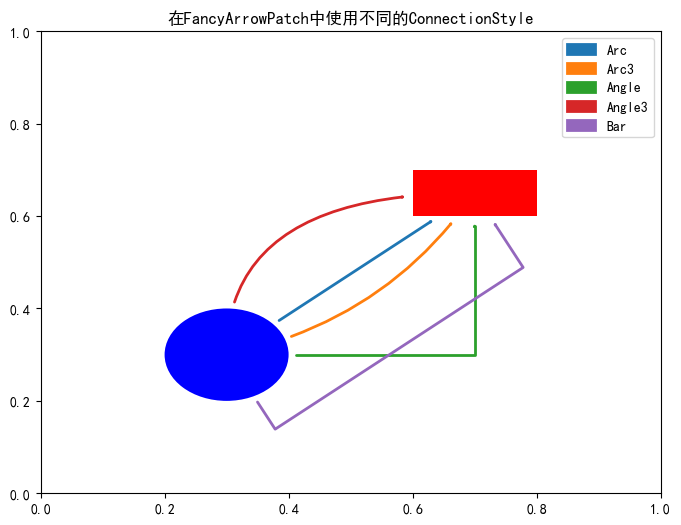

In [3]:
from matplotlib.patches import Circle,Rectangle,FancyArrowPatch, ConnectionStyle

fig, ax = plt.subplots(figsize=(8, 6))

# 创建两个示例图形作为连接线的起点和终点
circle = Circle((0.3, 0.3), 0.1, fc='blue')
rect = Rectangle((0.6, 0.6), 0.2, 0.1, fc='red')

# 将创建的图形添加到坐标轴上
ax.add_patch(circle)
ax.add_patch(rect)

# 定义不同的连接线样式列表
styles = [
    # Arc样式：带延伸臂的弧线连接
    ('Arc', ConnectionStyle.Arc(angleA=0, angleB=0, armA=0.1, armB=0.1, rad=0.0)),
    # Arc3样式：简单弧线连接，rad控制曲率
    ('Arc3', ConnectionStyle.Arc3(rad=0.2)),
    # Angle样式：带圆角的折角连接
    ('Angle', ConnectionStyle.Angle(angleA=0, angleB=90, rad=0.0)),
    # Angle3样式：基本折角连接
    ('Angle3', ConnectionStyle.Angle3(angleA=90, angleB=0)),
    # Bar样式：直角延伸的连线
    ('Bar', ConnectionStyle.Bar(armA=0.1, armB=0.1, fraction=0.3))
]

# 遍历样式列表，为每种样式创建连接线
for i, (name, style) in enumerate(styles):
    # 创建带样式的箭头连接线
    arrow = FancyArrowPatch(
        (0.3, 0.3),     # 起点坐标
        (0.7, 0.65),    # 终点坐标
        patchA=circle,  # 起点关联的图形（连线会自动适配图形边界）
        patchB=rect,    # 终点关联的图形
        shrinkA=5.,     # 起点收缩距离（像素），避免箭头与圆形重叠
        shrinkB=5.,     # 终点收缩距离（像素），避免箭头与矩形重叠
        connectionstyle=style,  # 连接线样式
        arrowstyle='->',        # 箭头样式（简单箭头）
        lw=2,                   # 线宽为2
        color=f'C{i}',          # 线条颜色，使用matplotlib的默认颜色循环
        label=name              # 样式名称，用于图例显示
    )
    # 将箭头添加到坐标轴
    ax.add_patch(arrow)


plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title('在FancyArrowPatch中使用不同的ConnectionStyle')
plt.show()

### 示例 2：标注数据点

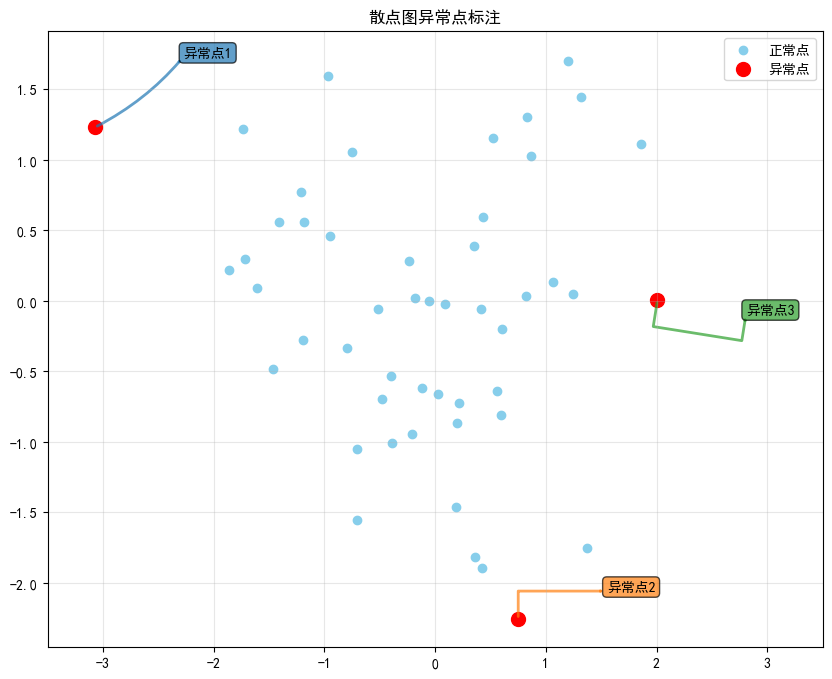

In [4]:
from matplotlib.patches import ConnectionStyle, FancyArrowPatch

# 生成随机数据
np.random.seed(44)
x = np.random.normal(0, 1, 50) 
y = np.random.normal(0, 1, 50)

# 标记异常点
outliers = (np.abs(x) > 2) | (np.abs(y) > 2)

fig, ax = plt.subplots(figsize=(10, 8))

# 绘制普通点和异常点
# 绘制正常点：使用~取反操作，选择非异常点
ax.scatter(x[~outliers], y[~outliers], c='skyblue', label='正常点')
ax.scatter(x[outliers], y[outliers], c='red', s=100, label='异常点')

# 为异常点添加标注，使用不同连接样式
styles = [
    ConnectionStyle.Arc3(rad=0.1),    # 弧线样式，曲率0.1
    ConnectionStyle.Angle(rad=0.05),  # 带圆角的折角样式，圆角半径0.05
    ConnectionStyle.Bar()             # 直角延伸样式，默认参数
]
# 定义异常点的标签文本
labels = ['异常点1', '异常点2', '异常点3']

# 遍历异常点、样式和标签，为异常点添加标注
# np.where(outliers)[0][:3]：获取前3个异常点的索引
for i, (idx, style, label) in enumerate(zip(np.where(outliers)[0][:3], styles, labels)):
    posA = (x[idx], y[idx])  # 异常点的坐标（箭头起点）
    # 标注文本的位置（箭头终点）：在异常点坐标基础上偏移，避免重叠
    posB = (x[idx] + 0.8, y[idx] + 0.5 - i * 0.3)
    
    # 定义标注框样式
    bbox = dict(
        boxstyle="round,pad=0.3",  # 圆角矩形框，内边距0.3
        facecolor=f'C{i}',  # 背景色使用matplotlib默认颜色循环
        alpha=0.7  # 透明度0.7
    )
    # 添加标注文本
    ax.text(posB[0], posB[1], label, bbox=bbox)
    
    # 创建连接箭头：连接异常点和标注文本
    arrow = FancyArrowPatch(
        posA,  # 箭头起点（异常点）
        posB,  # 箭头终点（标注文本）
        connectionstyle=style,  # 连接线样式
        arrowstyle='->',  # 箭头样式（简单箭头）
        lw=2,  # 线宽2
        color=f'C{i}',  # 线条颜色与标注框一致
        alpha=0.7  # 透明度0.7
    )
    # 将箭头添加到坐标轴
    ax.add_patch(arrow)

ax.legend()
ax.set_title('散点图异常点标注')
plt.xlim(-3.5,3.5)
plt.grid(alpha=0.3)
plt.show()